---

# Training Auto-encoder

>This notebook contains code for training the auto-encoder with reconstruction loss.
>Audio is cropped to 1 second (44100 samples). ie. the model generates 1 second of audio for each inference.

---

In [1]:
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import IPython.display as ipd

# Dataset

### Load audio files

In [16]:
y = np.load('../corpus/audio.npy')

## Auto-encoder

### Encoder

In [22]:
audio_shape = (44100,)

audio_input = layers.Input(shape=audio_shape, name='Input')

x = layers.Reshape((audio_shape[0], 1))(audio_input)
x = layers.Conv1D(32, 3, activation='relu')(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(64, 3, activation='relu')(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='tanh')(x)

encoder = models.Model(audio_input, x, name='Encoder')

### Decoder

In [23]:
latent_input = layers.Input(shape=(64,))
x = layers.Dense(128, activation='relu')(latent_input)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(44100, activation='tanh')(x)
x = layers.Reshape((44100,))(x)

decoder = models.Model(latent_input, x, name='Decoder')

### Combine encoder and decoder

In [5]:
z = encoder(audio_input)
output = decoder(z)

ae = models.Model(audio_input, output)

ae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 44100)]           0         
                                                                 
 Encoder (Functional)        (None, 64)                45156608  
                                                                 
 Decoder (Functional)        (None, 44100)             11375044  
                                                                 
Total params: 56,531,652
Trainable params: 56,531,652
Non-trainable params: 0
_________________________________________________________________


### Train model

Train the auto-encoder with reconstruction loss

In [20]:
ae.compile(optimizer='adam', loss='mean_squared_error')

In [64]:
ae.fit(y, y, epochs=10)

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 8.1761e-06
Epoch 2/10
7/7 [==============================] - 7s 1s/step - loss: 7.2596e-06
Epoch 3/10
7/7 [==============================] - 7s 996ms/step - loss: 6.8159e-06
Epoch 4/10
7/7 [==============================] - 7s 1s/step - loss: 6.7724e-06
Epoch 5/10
7/7 [==============================] - 7s 990ms/step - loss: 6.7395e-06
Epoch 6/10
7/7 [==============================] - 10s 1s/step - loss: 6.2967e-06
Epoch 7/10
7/7 [==============================] - 7s 999ms/step - loss: 6.2295e-06
Epoch 8/10
7/7 [==============================] - 7s 993ms/step - loss: 5.9795e-06
Epoch 9/10
7/7 [==============================] - 7s 976ms/step - loss: 5.7897e-06
Epoch 10/10
7/7 [==============================] - 7s 985ms/step - loss: 5.9357e-06


### Test model

In [65]:
y_test = y[0]

ipd.display(ipd.Audio(data=y_test, rate=44100))

In [66]:
latent = encoder.predict(np.array([y_test]))

y_recon = decoder.predict(latent)[0]

1/1 [==============================] - 0s 14ms/step


In [67]:
ipd.display(ipd.Audio(data=y_recon, rate=44100))

### Save models

In [71]:
encoder.save('../models/encoder.h5')
decoder.save('../models/decoder.h5')

### Save latents

In [69]:
latents = encoder.predict(y)

7/7 [==============================] - 2s 235ms/step


In [70]:
np.save('../corpus/latents.npy', latents)

## Plot model

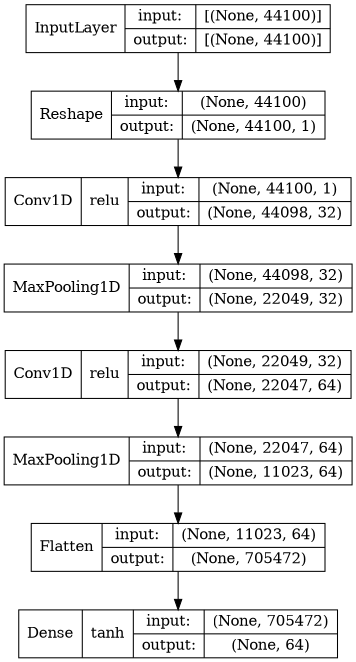

In [24]:
tf.keras.utils.plot_model(
    encoder,
    to_file='../plots/encoder.png',
    show_shapes=True,
    show_layer_names=False,
    expand_nested=True,
    dpi=75,
    show_layer_activations=True
)

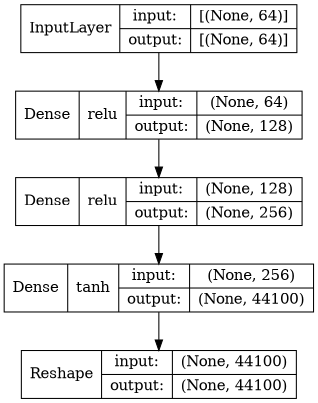

In [25]:
tf.keras.utils.plot_model(
    decoder,
    to_file='../plots/decoder.png',
    show_shapes=True,
    show_layer_names=False,
    expand_nested=True,
    dpi=75,
    show_layer_activations=True
)